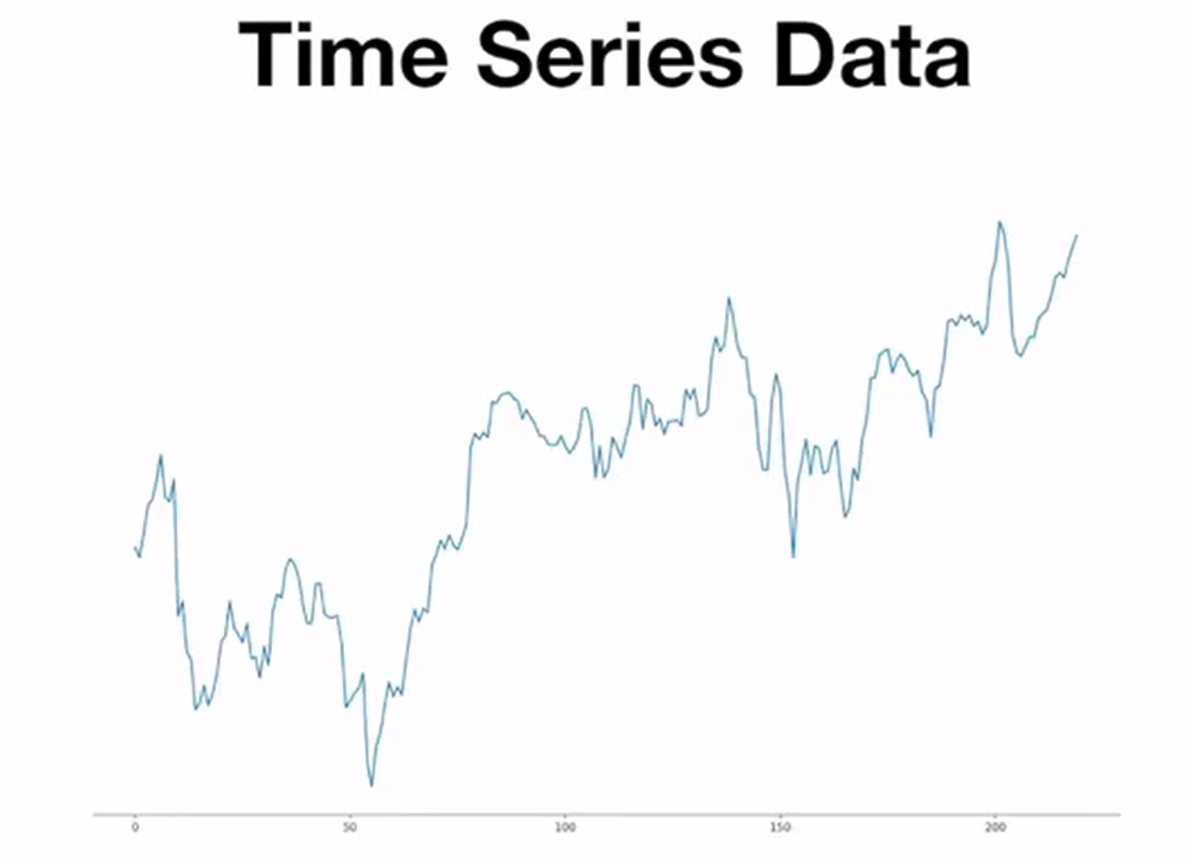

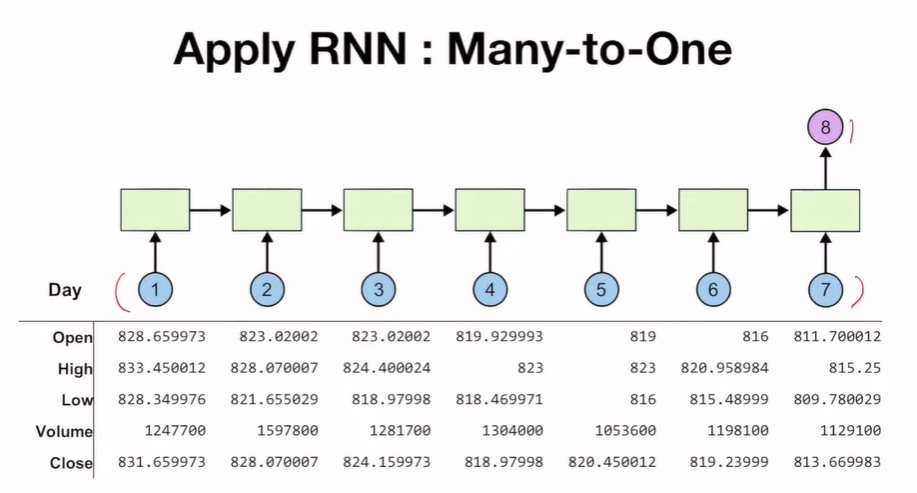

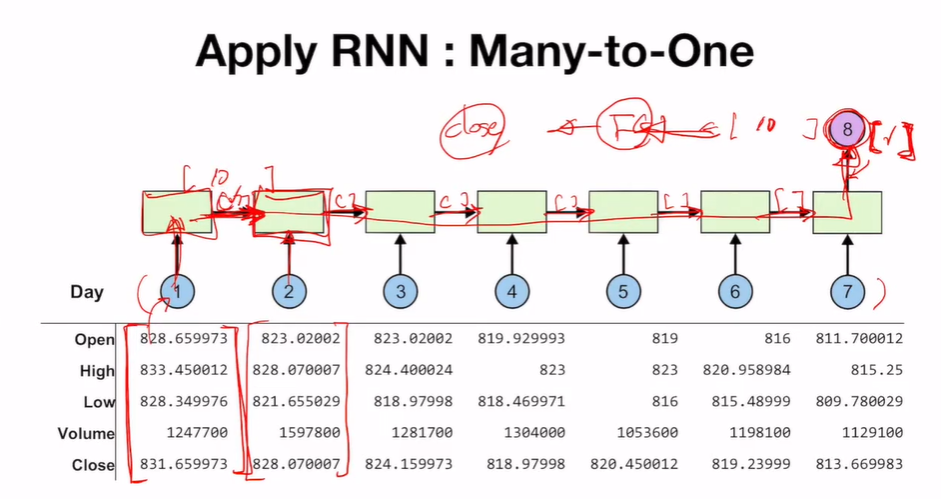

- 첫 번쨰 라인의 5개의 dimension을 가진 벡터가 input data로 들어감
- 이후의 하나의 값으로 압축을 해서 다음 셀에 전달

In [4]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [5]:
torch.manual_seed(0)

In [6]:
# scaling function for input data
def minmax_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)


In [7]:
def minmax_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

In [8]:
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        _x = time_series[i:i + seq_length, :]
        _y = time_series[i + seq_length, [-1]]  # Next close price
        print(_x, "->", _y)
        dataX.append(_x)
        dataY.append(_y)
    return np.array(dataX), np.array(dataY)

In [9]:
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1    # 마지막 FC가 맞춰야하는 종가의 dimension, 1개 
learning_rate = 0.01
iterations = 500

In [10]:
# load data
xy = np.loadtxt("data-02-stock_daily.csv", delimiter=",")
xy = xy[::-1]  # 역순으로 정렬

# split train-test set
train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]

# scaling data, 학습의 부담을 덜어주는 scaling, 0~1사이의 값으로 scaling 해줌
train_set = minmax_scaler(train_set) 
test_set = minmax_scaler(test_set)

# make train-test dataset to input
trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

# convert to tensor
trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY)

testX_tensor = torch.FloatTensor(testX)
testY_tensor = torch.FloatTensor(testY)

[[2.53065030e-01 2.45070970e-01 2.33983036e-01 4.66075110e-04
  2.32039560e-01]
 [2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.78314566e-01 1.98470380e-01 5.70171193e-01
  1.78104644e-01]] -> [0.16053716]
[[2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.7831

 [0.28087297 0.28335047 0.31181032 0.12868155 0.29766251]] -> [0.29505729]
[[0.33414248 0.34197789 0.36493623 0.33420274 0.36448258]
 [0.34214676 0.3333657  0.34331344 0.15072152 0.33381857]
 [0.31809951 0.30921056 0.33450692 0.13117325 0.31185038]
 [0.29950345 0.31866991 0.33278852 0.15418123 0.33600125]
 [0.32051449 0.31305548 0.31009191 0.17191001 0.29048055]
 [0.28087297 0.28335047 0.31181032 0.12868155 0.29766251]
 [0.26600296 0.27974379 0.29931634 0.11423322 0.29505729]] -> [0.29857781]
[[0.34214676 0.3333657  0.34331344 0.15072152 0.33381857]
 [0.31809951 0.30921056 0.33450692 0.13117325 0.31185038]
 [0.29950345 0.31866991 0.33278852 0.15418123 0.33600125]
 [0.32051449 0.31305548 0.31009191 0.17191001 0.29048055]
 [0.28087297 0.28335047 0.31181032 0.12868155 0.29766251]
 [0.26600296 0.27974379 0.29931634 0.11423322 0.29505729]
 [0.28387455 0.28539215 0.30533065 0.14464462 0.29857781]] -> [0.26657617]
[[0.31809951 0.30921056 0.33450692 0.13117325 0.31185038]
 [0.29950345 0.318669

 [0.09957004 0.11066715 0.11133528 0.17805862 0.09192159]] -> [0.07481176]
[[0.12541128 0.12560473 0.13145438 0.22924621 0.11515716]
 [0.11205927 0.11917375 0.12970027 0.20806668 0.12121244]
 [0.09484332 0.13002817 0.11792231 0.16701622 0.14370895]
 [0.1325874  0.13730964 0.13603665 0.15275612 0.11797353]
 [0.114371   0.12910937 0.14154965 0.14366765 0.12600055]
 [0.09957004 0.11066715 0.11133528 0.17805862 0.09192159]
 [0.09691349 0.09229303 0.09203955 0.25145648 0.07481176]] -> [0.00999833]
[[0.11205927 0.11917375 0.12970027 0.20806668 0.12121244]
 [0.09484332 0.13002817 0.11792231 0.16701622 0.14370895]
 [0.1325874  0.13730964 0.13603665 0.15275612 0.11797353]
 [0.114371   0.12910937 0.14154965 0.14366765 0.12600055]
 [0.09957004 0.11066715 0.11133528 0.17805862 0.09192159]
 [0.09691349 0.09229303 0.09203955 0.25145648 0.07481176]
 [0.05834126 0.05809648 0.0051551  0.35460249 0.00999833]] -> [0.0434436]
[[0.09484332 0.13002817 0.11792231 0.16701622 0.14370895]
 [0.1325874  0.1373096

 [0.12161618 0.13479168 0.15053518 0.11579278 0.1452226 ]] -> [0.11089737]
[[0.16001568 0.15643241 0.17158524 0.13891727 0.16979622]
 [0.16436296 0.15758945 0.17810062 0.12561621 0.16708521]
 [0.15097653 0.16361205 0.17810062 0.14675988 0.16412814]
 [0.14352421 0.14152899 0.14510105 0.23269696 0.13321763]
 [0.11747605 0.13186556 0.12765957 0.20712557 0.14075166]
 [0.12161618 0.13479168 0.15053518 0.11579278 0.1452226 ]
 [0.11733795 0.11522658 0.11974807 0.19215739 0.11089737]] -> [0.15078511]
[[0.16436296 0.15758945 0.17810062 0.12561621 0.16708521]
 [0.15097653 0.16361205 0.17810062 0.14675988 0.16412814]
 [0.14352421 0.14152899 0.14510105 0.23269696 0.13321763]
 [0.11747605 0.13186556 0.12765957 0.20712557 0.14075166]
 [0.12161618 0.13479168 0.15053518 0.11579278 0.1452226 ]
 [0.11733795 0.11522658 0.11974807 0.19215739 0.11089737]
 [0.10678059 0.13649309 0.13224183 0.14979833 0.15078511]] -> [0.14582117]
[[0.15097653 0.16361205 0.17810062 0.14675988 0.16412814]
 [0.14352421 0.141528

 [0.60220501 0.60880166 0.59679644 0.45005826 0.59225182]] -> [0.58795666]
[[0.46151036 0.47239081 0.49974532 0.13292104 0.48124925]
 [0.48190049 0.51679486 0.52122469 0.20851483 0.53240273]
 [0.51871286 0.50835313 0.51796708 0.14024379 0.52853001]
 [0.50225588 0.49916936 0.50887423 0.12512324 0.50254845]
 [0.49966831 0.50175537 0.51438369 0.16145021 0.49702118]
 [0.60220501 0.60880166 0.59679644 0.45005826 0.59225182]
 [0.58109049 0.57511571 0.58970809 0.26250784 0.58795666]] -> [0.57700785]
[[0.48190049 0.51679486 0.52122469 0.20851483 0.53240273]
 [0.51871286 0.50835313 0.51796708 0.14024379 0.52853001]
 [0.50225588 0.49916936 0.50887423 0.12512324 0.50254845]
 [0.49966831 0.50175537 0.51438369 0.16145021 0.49702118]
 [0.60220501 0.60880166 0.59679644 0.45005826 0.59225182]
 [0.58109049 0.57511571 0.58970809 0.26250784 0.58795666]
 [0.56812508 0.5734144  0.58745646 0.16158466 0.57700785]] -> [0.57936654]
[[0.51871286 0.50835313 0.51796708 0.14024379 0.52853001]
 [0.50225588 0.499169

 [0.54703815 0.5560271  0.57739325 0.12616295 0.55838408]] -> [0.5956314]
[[0.5333412  0.52614873 0.51760918 0.18686027 0.52740341]
 [0.50615449 0.50519205 0.49401758 0.19487317 0.51613766]
 [0.50146243 0.510432   0.52895017 0.14706462 0.53180408]
 [0.5086732  0.51897259 0.54216721 0.11358788 0.54257691]
 [0.51233028 0.55065776 0.55698802 0.16131577 0.56239754]
 [0.54703815 0.5560271  0.57739325 0.12616295 0.55838408]
 [0.55204061 0.56875284 0.59747662 0.16830689 0.5956314 ]] -> [0.59725092]
[[0.50615449 0.50519205 0.49401758 0.19487317 0.51613766]
 [0.50146243 0.510432   0.52895017 0.14706462 0.53180408]
 [0.5086732  0.51897259 0.54216721 0.11358788 0.54257691]
 [0.51233028 0.55065776 0.55698802 0.16131577 0.56239754]
 [0.54703815 0.5560271  0.57739325 0.12616295 0.55838408]
 [0.55204061 0.56875284 0.59747662 0.16830689 0.5956314 ]
 [0.58464397 0.57501353 0.6072855  0.14369454 0.59725092]] -> [0.61098088]
[[0.50146243 0.510432   0.52895017 0.14706462 0.53180408]
 [0.5086732  0.5189725

 [0.95073266 0.94770185 0.8338928  0.5523976  0.82520556]] -> [0.75852662]
[[0.75563028 0.75625377 0.7404218  0.19595769 0.73029186]
 [0.78512848 0.80884121 0.80471657 0.2391772  0.83932294]
 [0.81724899 0.8472907  0.85644609 0.31069284 0.88153412]
 [0.88255911 0.89108232 0.91540707 0.45991754 0.91339492]
 [1.         1.         0.99194524 0.56827104 0.95792978]
 [0.95073266 0.94770185 0.8338928  0.5523976  0.82520556]
 [0.78716413 0.78607772 0.7671635  0.46256162 0.75852662]] -> [0.67248474]
[[0.78512848 0.80884121 0.80471657 0.2391772  0.83932294]
 [0.81724899 0.8472907  0.85644609 0.31069284 0.88153412]
 [0.88255911 0.89108232 0.91540707 0.45991754 0.91339492]
 [1.         1.         0.99194524 0.56827104 0.95792978]
 [0.95073266 0.94770185 0.8338928  0.5523976  0.82520556]
 [0.78716413 0.78607772 0.7671635  0.46256162 0.75852662]
 [0.72181947 0.70778356 0.68944413 0.45691494 0.67248474]] -> [0.66956263]
[[0.81724899 0.8472907  0.85644609 0.31069284 0.88153412]
 [0.88255911 0.891082

 [0.18799823 0.19864431 0.20304603 0.20205371 0.1915059 ]] -> [0.24777484]
[[0.27612253 0.27674627 0.27695594 0.14437466 0.26909979]
 [0.24536894 0.26149126 0.27853113 0.13576474 0.25428597]
 [0.22858345 0.2722074  0.25666117 0.13624928 0.28809502]
 [0.26970799 0.29012688 0.24733133 0.26373954 0.22680829]
 [0.19585147 0.2316533  0.22624897 0.22005628 0.22919778]
 [0.18799823 0.19864431 0.20304603 0.20205371 0.1915059 ]
 [0.18356211 0.24921912 0.22558266 0.23153618 0.24777484]] -> [0.21492137]
[[0.24536894 0.26149126 0.27853113 0.13576474 0.25428597]
 [0.22858345 0.2722074  0.25666117 0.13624928 0.28809502]
 [0.26970799 0.29012688 0.24733133 0.26373954 0.22680829]
 [0.19585147 0.2316533  0.22624897 0.22005628 0.22919778]
 [0.18799823 0.19864431 0.20304603 0.20205371 0.1915059 ]
 [0.18356211 0.24921912 0.22558266 0.23153618 0.24777484]
 [0.212997   0.23093447 0.24775545 0.1387838  0.21492137]] -> [0.30959934]
[[0.22858345 0.2722074  0.25666117 0.13624928 0.28809502]
 [0.26970799 0.290126

 [0.61615029 0.65275552 0.66068145 0.22646714 0.68072385]] -> [0.67797633]
[[0.60973577 0.62628933 0.62693732 0.60670158 0.60050167]
 [0.5400757  0.637371   0.59252688 0.39406251 0.62493287]
 [0.58563637 0.6103155  0.63347989 0.22335489 0.6141211 ]
 [0.5765841  0.59481297 0.62724015 0.13071433 0.62672481]
 [0.60679799 0.59988214 0.63920492 0.10330047 0.61734658]
 [0.61615029 0.65275552 0.66068145 0.22646714 0.68072385]
 [0.66542774 0.65033894 0.69552192 0.09726234 0.67797633]] -> [0.69290973]
[[0.5400757  0.637371   0.59252688 0.39406251 0.62493287]
 [0.58563637 0.6103155  0.63347989 0.22335489 0.6141211 ]
 [0.5765841  0.59481297 0.62724015 0.13071433 0.62672481]
 [0.60679799 0.59988214 0.63920492 0.10330047 0.61734658]
 [0.61615029 0.65275552 0.66068145 0.22646714 0.68072385]
 [0.66542774 0.65033894 0.69552192 0.09726234 0.67797633]
 [0.66003224 0.68753314 0.71054018 0.13658473 0.69290973]] -> [0.69541844]
[[0.58563637 0.6103155  0.63347989 0.22335489 0.6141211 ]
 [0.5765841  0.594812

 [0.60925608 0.6169173  0.62833058 0.18744293 0.59739577]] -> [0.55390953]
[[0.45542816 0.5429768  0.50698499 0.32710263 0.53897613]
 [0.50476598 0.55443551 0.5284312  0.16384949 0.5747565 ]
 [0.57502538 0.59180672 0.61154929 0.13063978 0.61507668]
 [0.60170251 0.60536397 0.5859233  0.17521758 0.55122145]
 [0.54918761 0.57412325 0.58955806 0.13734881 0.60295095]
 [0.60925608 0.6169173  0.62833058 0.18744293 0.59739577]
 [0.57988119 0.56577081 0.55714693 0.16612311 0.55390953]] -> [0.55803117]
[[0.50476598 0.55443551 0.5284312  0.16384949 0.5747565 ]
 [0.57502538 0.59180672 0.61154929 0.13063978 0.61507668]
 [0.60170251 0.60536397 0.5859233  0.17521758 0.55122145]
 [0.54918761 0.57412325 0.58955806 0.13734881 0.60295095]
 [0.60925608 0.6169173  0.62833058 0.18744293 0.59739577]
 [0.57988119 0.56577081 0.55714693 0.16612311 0.55390953]
 [0.55907926 0.54641909 0.58907368 0.         0.55803117]] -> [0.59721639]
[[0.57502538 0.59180672 0.61154929 0.13063978 0.61507668]
 [0.60170251 0.605363

In [11]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, layers):
        super(Net, self).__init__()
        self.rnn = torch.nn.LSTM(input_dim, hidden_dim, num_layers=layers, batch_first=True) # LSTM
        self.fc = torch.nn.Linear(hidden_dim, output_dim, bias=True)  # FC

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x[:, -1])
        return x


net = Net(data_dim, hidden_dim, output_dim, 1)

In [12]:
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

In [10]:
# start training
for i in range(iterations):

    optimizer.zero_grad()
    outputs = net(trainX_tensor)
    loss = criterion(outputs, trainY_tensor)
    loss.backward()
    optimizer.step()
    print(i, loss.item())

0 0.2271038442850113
1 0.18340936303138733
2 0.15106438100337982
3 0.12612313032150269
4 0.10598734766244888
5 0.08915018290281296
6 0.07493706792593002
7 0.06327901780605316
8 0.054496027529239655
9 0.04902385547757149
10 0.04693441092967987
11 0.04731706529855728
12 0.04838264361023903
13 0.04839478060603142
14 0.04633766785264015
15 0.04207771271467209
16 0.03620169684290886
17 0.029662013053894043
18 0.02338656410574913
19 0.018011242151260376
20 0.013800662942230701
21 0.010714655742049217
22 0.008532220497727394
23 0.0069765085354447365
24 0.0058244820684194565
25 0.004987423773854971
26 0.004524713382124901
27 0.004554683342576027
28 0.005089898593723774
29 0.005920968484133482
30 0.006684893276542425
31 0.00707267364487052
32 0.0069739907048642635
33 0.006471904926002026
34 0.005753521341830492
35 0.005014693830162287
36 0.004395292606204748
37 0.003953744191676378
38 0.0036766387056559324
39 0.0035109843593090773
40 0.0034013083204627037
41 0.003315107896924019
42 0.0032488945

327 0.001445250352844596
328 0.001443645334802568
329 0.0014420473016798496
330 0.0014404554385691881
331 0.0014388707932084799
332 0.0014372927835211158
333 0.0014357217587530613
334 0.0014341565547510982
335 0.0014325979864224792
336 0.0014310459373518825
337 0.0014295006403699517
338 0.001427961396984756
339 0.0014264287892729044
340 0.0014249020023271441
341 0.0014233820838853717
342 0.001421867636963725
343 0.001420359592884779
344 0.0014188577188178897
345 0.0014173620147630572
346 0.0014158723643049598
347 0.0014143888838589191
348 0.0014129112241789699
349 0.0014114396180957556
350 0.0014099738327786326
351 0.0014085141010582447
352 0.0014070604229345918
353 0.0014056125655770302
354 0.0014041706454008818
355 0.0014027344295755029
356 0.0014013043837621808
357 0.0013998798094689846
358 0.0013984612887725234
359 0.0013970488216727972
360 0.0013956425245851278
361 0.0013942416990175843
362 0.0013928472762927413
363 0.001391458441503346
364 0.0013900762423872948
365 0.001388699980

In [1]:
plt.plot(testY)
plt.plot(net(testX_tensor).data.numpy())
plt.legend(['original', 'prediction'])
plt.show()

NameError: name 'plt' is not defined